In [98]:
import cv2 
import matplotlib.pyplot as plt
import pytesseract
import pandas as pd

In [99]:
Path=r'D:\Computer Vision\OCR\scooter np.jpg'

In [100]:
img=cv2.imread(Path)
img=cv2.resize(img,dsize=[800,550])

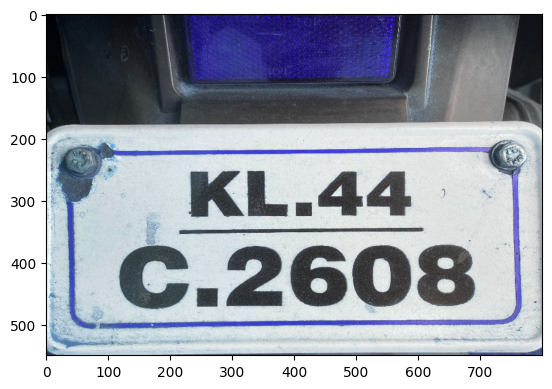

In [101]:
plt.imshow(img)

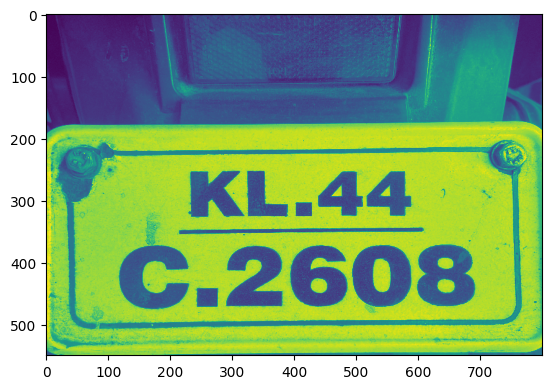

In [102]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

In [103]:
(thresh,binary_img)=cv2.threshold(gray_img,225,250,cv2.THRESH_BINARY + cv2.THRESH_OTSU)


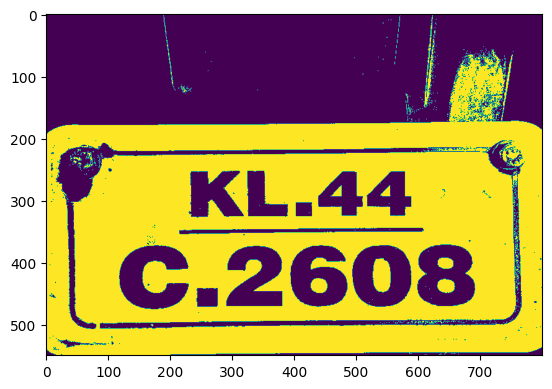

In [104]:
plt.imshow(binary_img)

In [105]:
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [106]:
text=pytesseract.image_to_string(binary_img,lang ='eng', config='--psm 12')
print(text)

\

KL.44 ,

C.2608



In [107]:
import re
text=re.sub(r'[^\w\s]|[\n\r\t]','',text)
print(text)

KL44 C2608


In [108]:
state=text[0:2]
rto=text[2:4]
no=text[4:10]
Vehicle_Number={'State':[state],'RTO':[rto],'Number':[no]}
Vehicle_Number

{'State': ['KL'], 'RTO': ['44'], 'Number': [' C2608']}

In [109]:
df=pd.DataFrame(Vehicle_Number)
df

,State,RTO,Number
0,KL,44,C2608


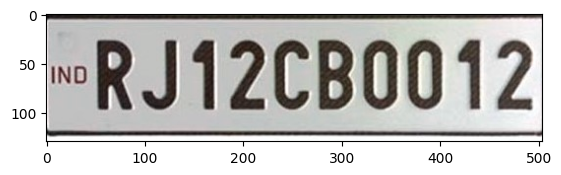

In [110]:
Path1=r'D:\Computer Vision\OCR\RJ-rajasthan-HSRP-number-plates.jpg'
img1=cv2.imread(Path1)
plt.imshow(img1)

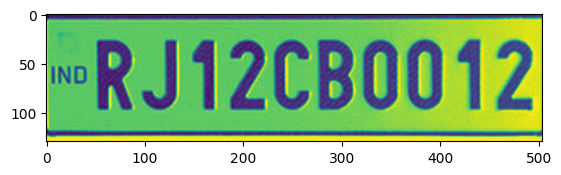

In [111]:
gray_img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img1)

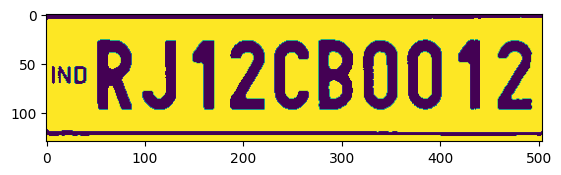

In [112]:
(thresh,binary_img1)=cv2.threshold(gray_img1,225,250,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary_img1)

In [113]:
text1=pytesseract.image_to_string(binary_img1,lang ='eng', config='--psm 11')
print(text1)

RJ12CB0012



In [114]:
state=text1[0:2]
rto=text1[2:4]
no=text1[4:10]
Vehicle_Number1={'State':state,'RTO':rto,'Number':no}
Vehicle_Number1

{'State': 'RJ', 'RTO': '12', 'Number': 'CB0012'}

In [115]:
df=df.append(Vehicle_Number1,ignore_index=True)
df.reset_index(inplace=True,drop=True)
df.index+=1
df

,State,RTO,Number
1,KL,44,C2608
2,RJ,12,CB0012


In [116]:
import pandas as pd
# dfe=pd.read_csv(r'D:\Computer Vision\OCR\RT & SRT office India details.csv',encoding="ISO-8859-1")
dfe=pd.read_csv(r'D:\Computer Vision\OCR\State.csv')
dfe.head()


,State,State ab
0,AN,Andaman and Nicobar
1,AP,Andhra Pradesh
2,AR,Arunachal Pradesh
3,AS,Assam
4,BR,Bihar


In [117]:
merged_df = pd.merge(df, dfe[['State','State ab']], on='State', how='inner')
dfl=pd.read_csv(r'D:\Computer Vision\OCR\RT & SRT office India details.csv',encoding='iso-8859-1')
dfl['RTO'] = dfl['RTO'].astype(str)
merged_df = pd.merge(merged_df, dfl[['State', 'RTO', 'RT Office']], on=['State', 'RTO'], how='left')
merged_df.head()                

,State,RTO,Number,State ab,RT Office
0,KL,44,C2608,Kerala,Kothamangalam
1,RJ,12,CB0012,Rajasthan,Dungarpur


In [118]:
merged_df.to_excel('Vehicle_Registration.xlsx',index=False)

In [ ]:
def app():
    st.title('Resume keyword check')
    resume=st.file_uploader('Upload Resume',type=['Jpeg','jpg','png'])
    keywords=st.text_input('Enter keywords')
    if st.button('Search'):
        keywords=[keyword.strip() for keyword in keywords.split(',')]
        if resume is not None:
            if check(resume,keywords):
                st.write('Resume qualified')
            else:
                st.write('The resume has no enough keywords')
        else:
            st.write('Please upload Resume') 
app() 

In [ ]:
def app():
    st.title('Number Plate Number Extractor')